In [30]:
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
import datetime as dt
import numpy as np

In [31]:
#importing main dataset 
df = pd.read_csv('covid_19.csv', parse_dates=['Date'], dayfirst=True)
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [32]:
#keeping only required columns
df = df[['Date', 'State/UnionTerritory','Cured','Deaths','Confirmed']]
#renaming column names
df.columns = ['date', 'state','cured','deaths','confirmed']
df.head()

,date,state,cured,deaths,confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [33]:
#Getting states with maximum number of confirmed cases
top_states_confirmed=max_confirmed_cases[0:5]
top_states_confirmed

,date,state,cured,deaths,confirmed
850,2020-04-11,Maharashtra,188,110,1574
819,2020-04-10,Maharashtra,125,97,1364
788,2020-04-09,Maharashtra,117,72,1135
757,2020-04-08,Maharashtra,79,64,1018
857,2020-04-11,Tamil Nadu,44,8,911


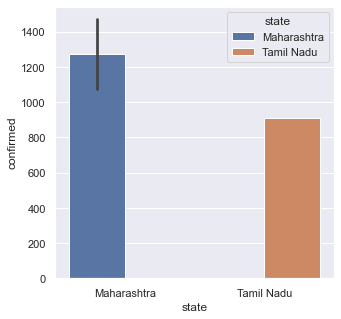

In [34]:
#Making bar-plot for states with top confirmed cases
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(x="state",y="confirmed",data=top_states_confirmed,hue="state")
plt.show()

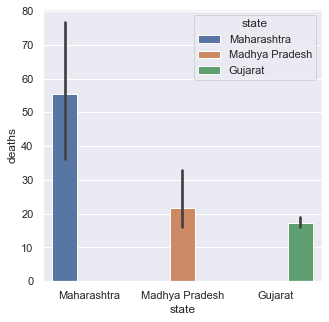

In [39]:
#Sorting data w.r.t number of death cases
max_death_cases=df.sort_values(by="deaths",ascending=False)
#Getting states with maximum number of death cases
top_states_death=max_death_cases[0:15]

#Making bar-plot for states with top death cases
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(x="state",y="deaths",data=top_states_death,hue="state")
plt.show()

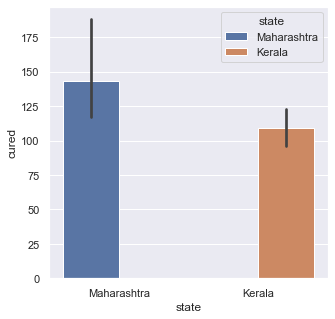

In [42]:
#Sorting data w.r.t number of cured cases
max_cured_cases=df.sort_values(by="cured",ascending=False)
#Getting states with maximum number of cured cases
top_states_cured=max_cured_cases[0:5]
#Making bar-plot for states with top death cases
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(x="state",y="cured",data=top_states_cured,hue="state")
plt.show()

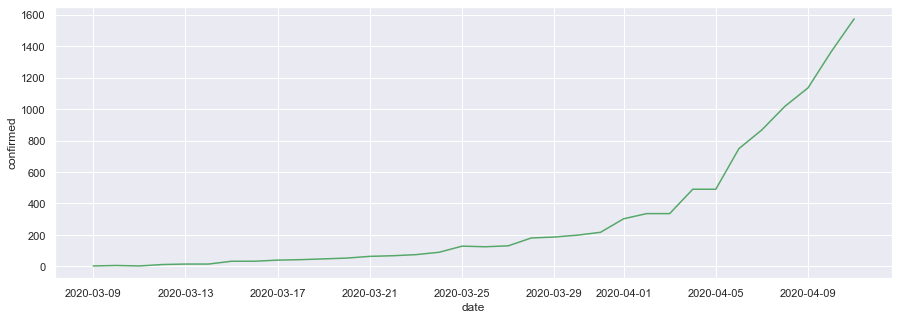

In [55]:
#Maharashtra
maha = df[df.state == 'Maharashtra']

#Visualizing confirmed cases in maharashtra
sns.set(rc={'figure.figsize':(15,5)})
sns.lineplot(x="date",y="confirmed",data=maha,color="g")
plt.show()

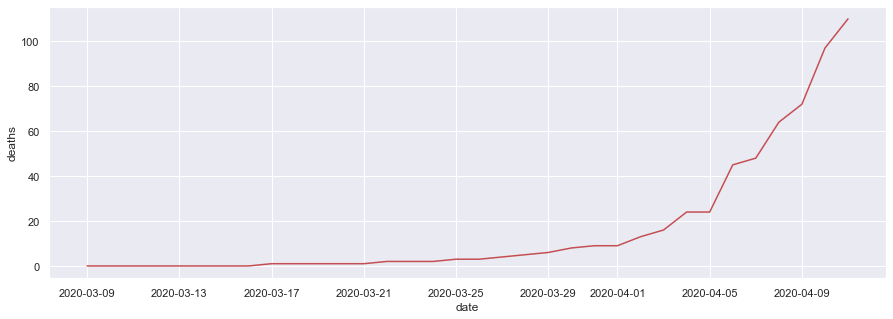

In [56]:
#Visualizing death cases in maharashtra
sns.set(rc={'figure.figsize':(15,5)})
sns.lineplot(x="date",y="deaths",data=maha,color="r")
plt.show()

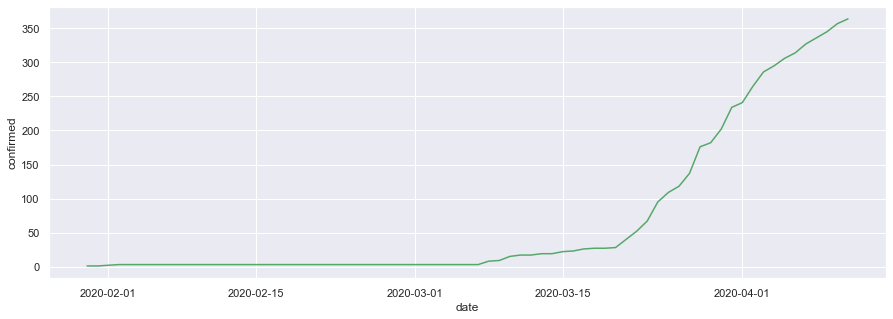

In [60]:
#kerala
kerala= df[df.state == 'Kerala']
#Visualizing confirmed cases in Kerala
sns.set(rc={'figure.figsize':(15,5)})
sns.lineplot(x="date",y="confirmed",data=kerala,color="g")
plt.show()

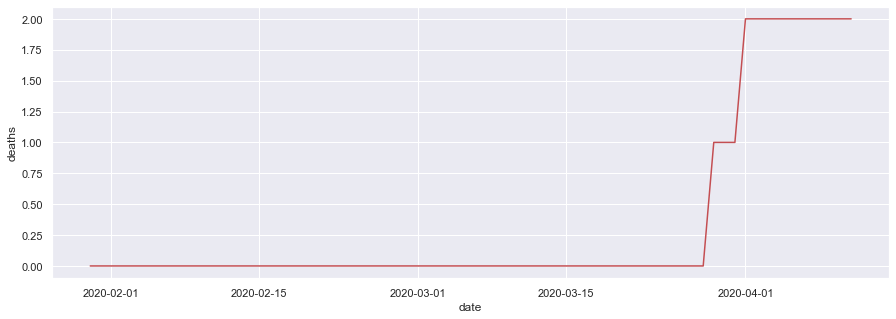

In [58]:
#Visualizing death cases in Kerala
sns.set(rc={'figure.figsize':(15,5)})
sns.lineplot(x="date",y="deaths",data=kerala,color="r")
plt.show()

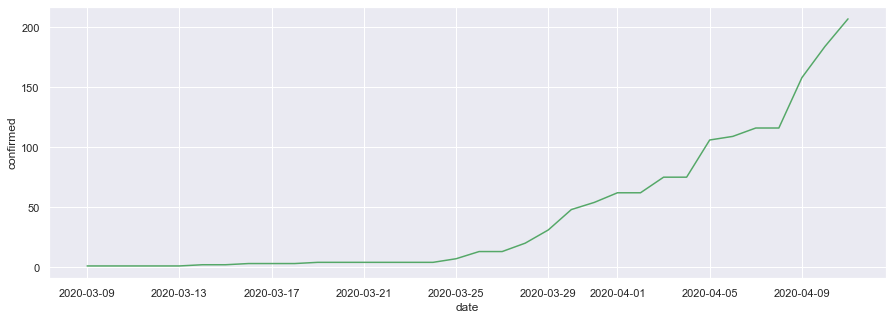

In [53]:
#Jammu and Kashmir
jk= df[df.state == 'Jammu and Kashmir']
#Visualizing confirmed cases in Jammu and Kashmir
sns.set(rc={'figure.figsize':(15,5)})
sns.lineplot(x="date",y="confirmed",data=jk,color="g")
plt.show()

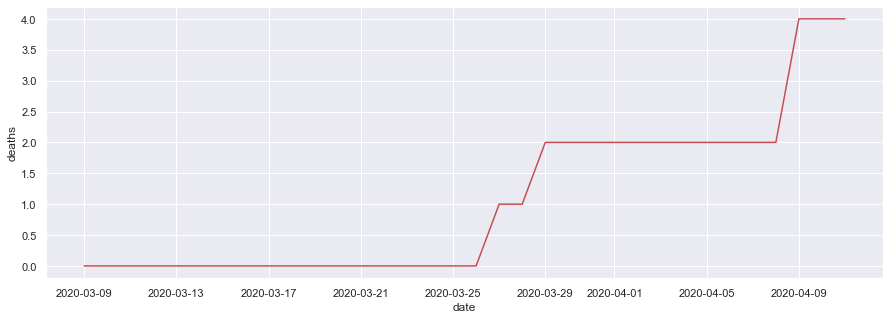

In [54]:
#Visualizing death cases in Jammu and Kashmir
sns.set(rc={'figure.figsize':(15,5)})
sns.lineplot(x="date",y="deaths",data=jk,color="r")
plt.show()

In [61]:
#Linear regression
from sklearn.model_selection import train_test_split

In [74]:
maha = df[df.state == 'Maharashtra']
maha.head()

,date,state,cured,deaths,confirmed
76,2020-03-09,Maharashtra,0,0,2
91,2020-03-10,Maharashtra,0,0,5
97,2020-03-11,Maharashtra,0,0,2
120,2020-03-12,Maharashtra,0,0,11
133,2020-03-13,Maharashtra,0,0,14


In [75]:
#converting date-time to ordinal
maha['date']=maha['date'].map(dt.datetime.toordinal)
maha.head()

<ipython-input-75-8dacbbfea4d6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maha['date']=maha['date'].map(dt.datetime.toordinal)


,date,state,cured,deaths,confirmed
76,737493,Maharashtra,0,0,2
91,737494,Maharashtra,0,0,5
97,737495,Maharashtra,0,0,2
120,737496,Maharashtra,0,0,11
133,737497,Maharashtra,0,0,14


In [76]:
#getting dependent variable and inpedent variable
x=maha['date']
y=maha['confirmed']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [78]:
from sklearn.ensemble import RandomForestRegressor
dtr = RandomForestRegressor()
dtr.fit(np.array(x_train).reshape(-1,1) , np.array(y_train).reshape(-1,))

RandomForestRegressor()

In [82]:
maha.tail(2)

,date,state,cured,deaths,confirmed
819,737525,Maharashtra,125,97,1364
850,737526,Maharashtra,188,110,1574


In [83]:
dtr.predict(np.array([[737526]]))

array([1477.12])